/Users/enniovisco/source/repos/distributed-monitor/preparation.ipynb:147: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  {


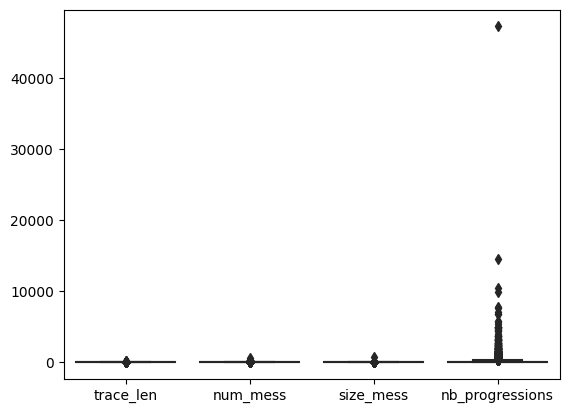

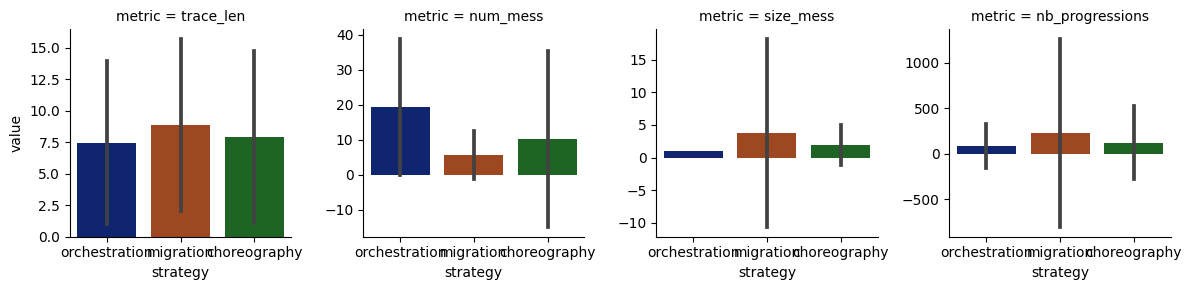

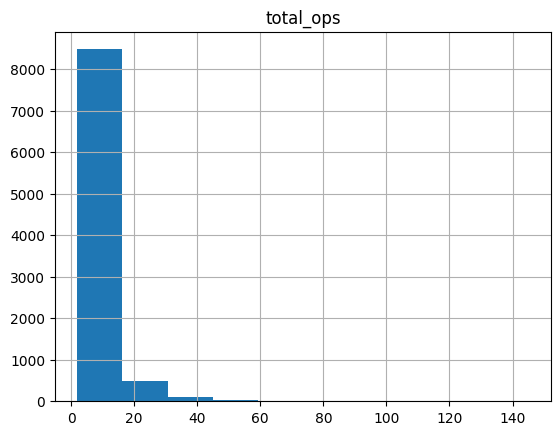

In [1]:
# noinspection PyUnresolvedReferences
from ipynb.fs.full.learning import final_df

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## PCA

In [3]:
# Separating out the features
x = final_df.loc[:, final_df.columns != 'strategy_id'].values
# Separating out the target
y = final_df.loc[:,['strategy_id']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
x

array([[-2.22674657, -1.62043304, -1.08703742, ...,  0.31282857,
         0.        ,  0.        ],
       [-2.02313976, -1.62043304, -0.94803931, ..., -1.03314858,
         0.        ,  0.        ],
       [-1.88870705, -1.62043304, -1.08703742, ...,  0.31282857,
         0.        ,  0.        ],
       ...,
       [ 1.26458815,  1.4348226 , 16.56572295, ...,  0.31282857,
         0.        ,  0.        ],
       [ 1.26458815,  1.4348226 , 16.98271729, ...,  0.31282857,
         0.        ,  0.        ],
       [ 1.48255185,  2.45324115,  0.99793427, ...,  0.31282857,
         0.        ,  0.        ]])

In [4]:
principal_components = ['pc 1', 'pc 2']

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = principal_components)

In [5]:
finalDf = pd.concat([principalDf, final_df[['strategy_id']]], axis = 1)
finalDf

,pc 1,pc 2,strategy_id
0,-2.718874,-0.945420,1
1,-2.612231,-1.045839,1
2,-2.623015,-0.864895,1
3,-2.660396,-0.896297,1
4,-2.645911,-1.074132,1
...,...,...,...
3962,7.859165,4.931077,1
3963,11.357633,4.706983,0
3964,15.308254,18.646308,0
3965,10.627426,14.048150,1


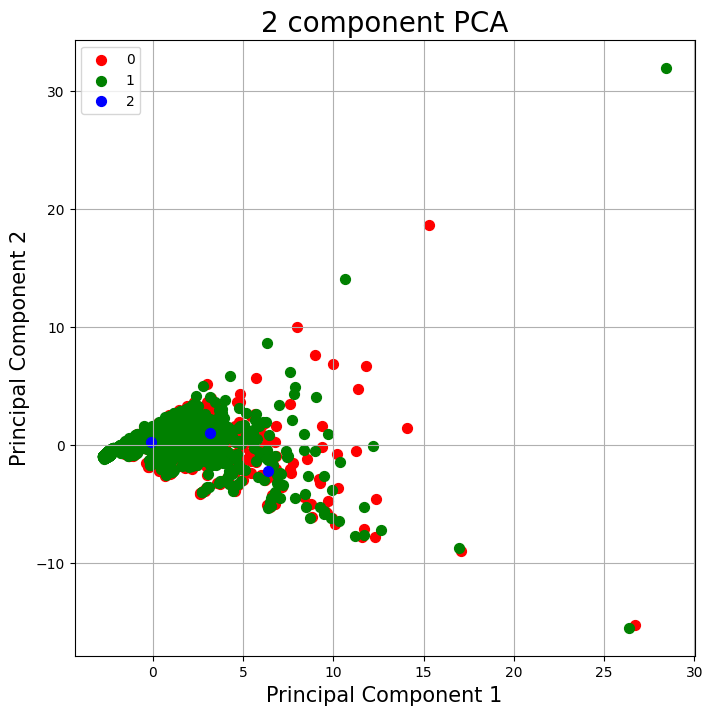

In [6]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['strategy_id'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc 1']
               , finalDf.loc[indicesToKeep, 'pc 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()